In [81]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df= pd.read_csv("clean_tweet.csv")

In [3]:
df

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0
...,...,...
1599995,just woke up having no school is the best feel...,4
1599996,thewdb com very cool to hear old walt intervie...,4
1599997,are you ready for your mojo makeover ask me fo...,4
1599998,happy th birthday to my boo of alll time tupac...,4


In [4]:
df['text']=df['text'].apply(str)

In [51]:
all_negative_tweets = df[df.target == 0]
all_positive_tweets = df[df.target == 4]

In [52]:
pos = all_positive_tweets[:10000]
neg = all_negative_tweets[:10000]

In [53]:
pos

,text,target
800000,i love u guys r the best,4
800001,im meeting up with one of my besties tonight c...,4
800002,thanks for the twitter add sunisa i got to mee...,4
800003,being sick can be really cheap when it hurts t...,4
800004,he has that effect on everyone,4
...,...,...
809995,morning i have slacked for two days in twitter...,4
809996,isn t that sweet of them altruism at it s finest,4
809997,um milk fathers don t have udders and milk i a...,4
809998,they could also tweet,4


<Figure size 3600x2400 with 0 Axes>

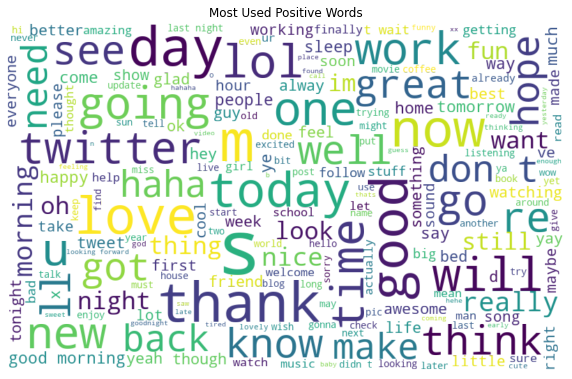

In [55]:
positive_words =' '.join([text for text in df['text'][df['target'] == 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('positive_words.png')
plt.show()

In [56]:
neg

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0
...,...,...
9995,aww that s sad,0
9996,stupid dvds stuffing up the good bits in jaws,0
9997,sephy no only close friends and family i m afr...,0
9998,crap after looking when i last tweeted why am ...,0


<Figure size 3600x2400 with 0 Axes>

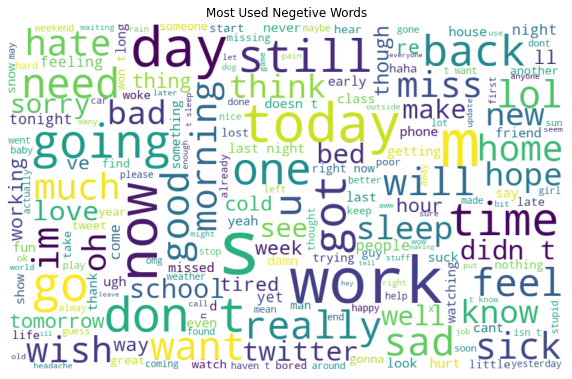

In [57]:
negetive_words =' '.join([text for text in df['text'][df['target'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
plt.savefig('negetive_words.png')
plt.show()

In [58]:
frame=[pos,neg]
df = pd.concat(frame)

In [59]:
df

,text,target
800000,i love u guys r the best,4
800001,im meeting up with one of my besties tonight c...,4
800002,thanks for the twitter add sunisa i got to mee...,4
800003,being sick can be really cheap when it hurts t...,4
800004,he has that effect on everyone,4
...,...,...
9995,aww that s sad,0
9996,stupid dvds stuffing up the good bits in jaws,0
9997,sephy no only close friends and family i m afr...,0
9998,crap after looking when i last tweeted why am ...,0


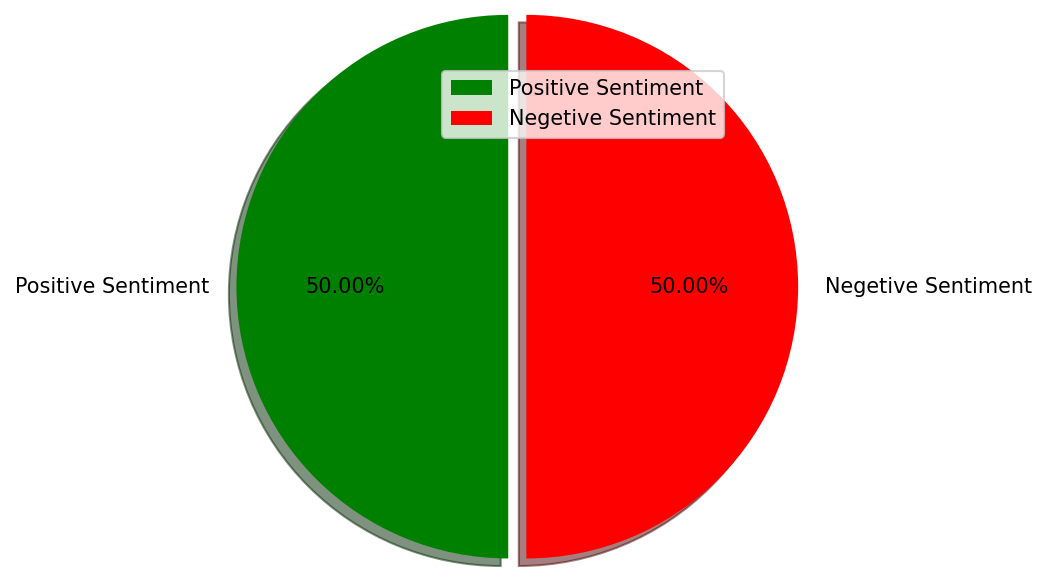

In [101]:
plt.figure(dpi=150)
sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(df['target'] != 0).sum(), (df['target'] == 0).sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show() 

In [60]:
df_x=df["text"]
df_y=df["target"]

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=0.2 , random_state=10)

In [62]:
x_train

8660                       finally met best friend s fiance
831       i don t think there s one close by last time i...
805511    ok i m off to school i ll stop bothering every...
803543    sweet breakfast meeting with gm loyalty rock o...
2340      haven t talk with aaliyah love in a few miss h...
                                ...                        
809372                            is now washed and dressed
807291    it doesn t work in parallels performance sucks...
7728                    staying away from tea all day today
807293    fresh radishes and rabbit pat for lunch with g...
7673                                is not very happy today
Name: text, Length: 16000, dtype: object

In [63]:
y_train

8660      0
831       0
805511    4
803543    4
2340      0
         ..
809372    4
807291    4
7728      0
807293    4
7673      0
Name: target, Length: 16000, dtype: int64

In [64]:
x_test

9778                                             wow me too
804376    i will loom into it ive never been to nz i wan...
188       love the french i tell people here in the sout...
809887               hey demi r u there if u r please reply
804441                    hehe you got till the end of week
                                ...                        
3123                 i love mountains but i live in belgium
8706      is very sad that he broke his wife s decorativ...
807274                drinking orange juice eating viscount
6155      oops hit enter i m not too bad today thanks st...
6712      exactly i ll grab the sheets tonight and do th...
Name: text, Length: 4000, dtype: object

In [65]:
y_test

9778      0
804376    4
188       0
809887    4
804441    4
         ..
3123      0
8706      0
807274    4
6155      0
6712      0
Name: target, Length: 4000, dtype: int64

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [67]:
train_vectors.shape

(16000, 3133)

In [68]:
test_vectors.shape

(4000, 3133)

In [69]:
a= train_vectors.toarray()

In [70]:
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Creating a Linear SVM Model**

In [71]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

# Perform classification with SVM, kernel=linear

classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

Training time: 28.305381s; Prediction time: 4.820530s


In [72]:
print(classification_report(y_test, prediction_linear))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      2018
           4       0.75      0.76      0.75      1982

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000



In [73]:
classifier_linear = svm.SVC(kernel='rbf')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

Training time: 69.433405s; Prediction time: 7.231824s


In [74]:
print(classification_report(y_test, prediction_linear))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2018
           4       0.76      0.76      0.76      1982

    accuracy                           0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000



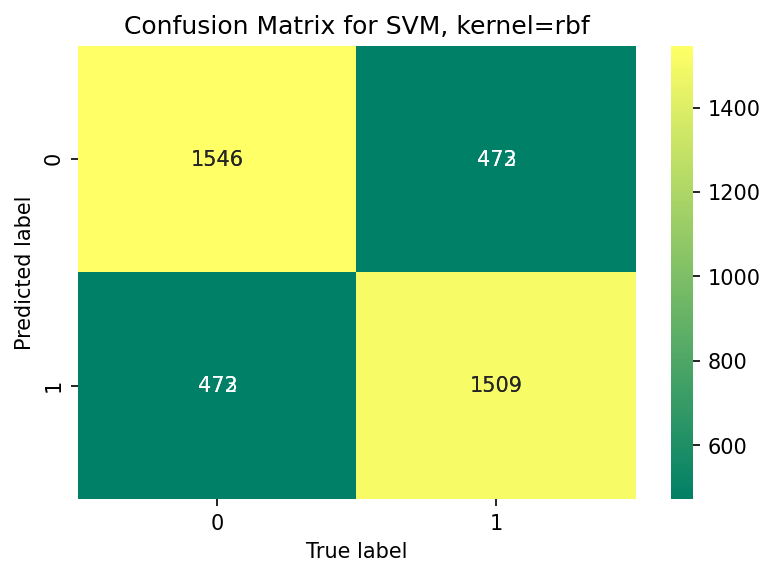

In [93]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=150)
mat = confusion_matrix(y_test, prediction_linear)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
sns.heatmap(mat,annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion Matrix for SVM, kernel=rbf')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

**Creating a Logistic Regression Model**

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5]:
    
    lr = LogisticRegression(C=c)
    lr.fit(train_vectors, y_train)
    y_predict_lr = lr.predict(test_vectors)
    print("Threshold :",c," --->", " Accuracy :",accuracy_score(y_test, y_predict_lr))

Threshold : 0.01  --->  Accuracy : 0.7225
Threshold : 0.05  --->  Accuracy : 0.73875
Threshold : 0.25  --->  Accuracy : 0.755
Threshold : 0.5  --->  Accuracy : 0.75775


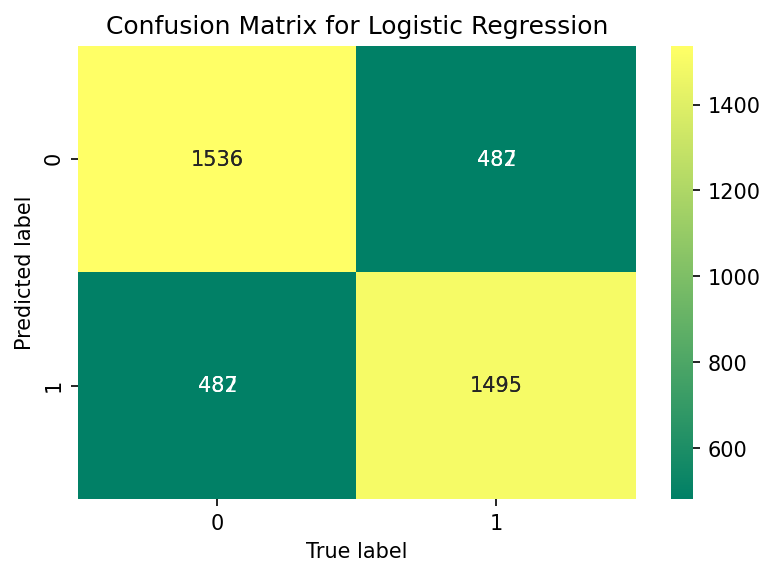

In [98]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=150)
mat = confusion_matrix(y_test, y_predict_lr)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
sns.heatmap(mat,annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

**Creating a Multinomial Naive Bayes Model**

In [76]:
from sklearn.naive_bayes import MultinomialNB
# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(train_vectors, y_train)
y_predict_nb = NB_model.predict(test_vectors)
print(accuracy_score(y_test, y_predict_nb))

0.75775


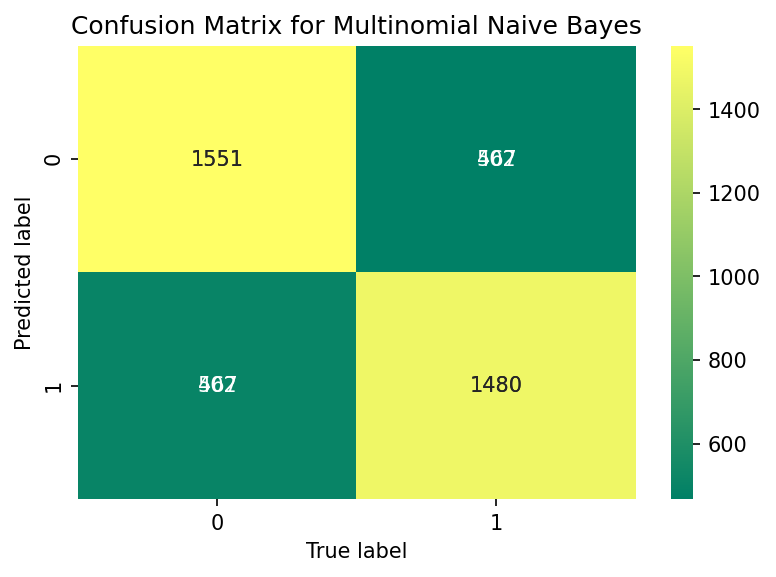

In [97]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=150)
mat = confusion_matrix(y_test, y_predict_nb)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
sns.heatmap(mat,annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

# Conclusion